# Visualizing The Gender Gap In College Degrees
When it comes to field of study it varies a lot between the genders. It also varies a lot over time. In this project we will look at #dataset# to visualize this apparent gender gap and how it has changed over time in different degrees.

Let's start by importing the relevant packages and create a dataframe based on the data set.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

We group the data in three categories; `stem_cats`, `lib_arts_cats` and `other_cats`. The degrees in these categories will be ordered descendingly on final share of women.

In [31]:
last_year = women_degrees[women_degrees['Year'] == women_degrees['Year'].max()]

stem_cats = list(last_year[['Biology', 'Computer Science', 'Engineering', 'Math and Statistics',
                            'Physical Sciences', 'Psychology']].iloc[0,:]
                            .sort_values(ascending=False).index)
print(stem_cats)

lib_arts_cats = list(last_year[['Art and Performance', 'Communications and Journalism', 'English',
                                'Foreign Languages', 'Social Sciences and History']].iloc[0,:]
                                .sort_values(ascending=False).index)
print(lib_arts_cats)

other_cats = list(last_year[['Agriculture','Architecture','Business','Education','Health Professions',
                             'Public Administration',]].iloc[0,:]
                             .sort_values(ascending=False).index)
print(other_cats)

['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']


Let's create some color blind friendly colors to use in our graphs. [Color blind 10](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) is a palette containing such colors, so let's pick two suitable colors from their set and have represent our respective lines. Let's also pick a grey one that we can use as a reference line.

In [57]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (127/255, 127/255, 127/255)

We want to create a bunch of subplots, each containing displaying the gender gap for the respective degrees over time. The STEM degrees are represented in the first column, liberal arts in the second column and the other degrees in the third.

To increase the data-ink ratio we remove the spines and tickmarks of the grid, as these don't really contribute to additional insights. Let's also remove all x-axis tick labels except the bottommost ones. Let's remove all tick labels for the y-axis, except for 0 and 100.

We also manually set the limits of the x- and y-axes to make sure all plots are identical in this regard, enhancing comparability.

We'll also add a horizontal centered reference line

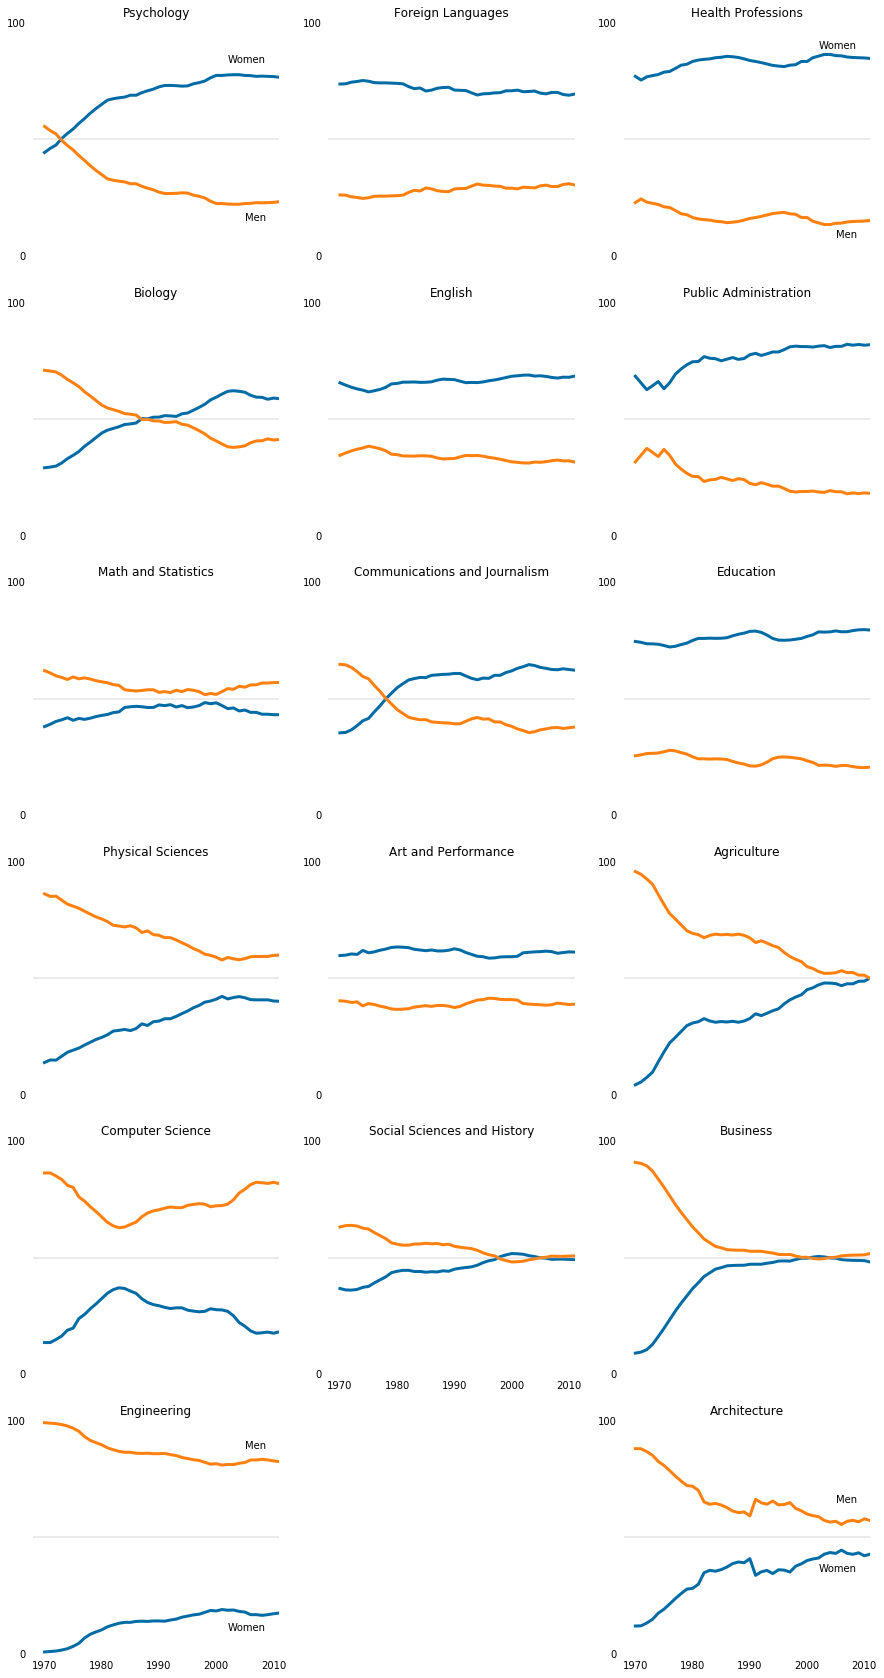

In [64]:
fig, ax = plt.subplots(6,3, figsize=(15,30))

def gen_plot(cats, start, end, col):
    for i in range(start,end+1):
        ax[i,col].plot(women_degrees['Year'], women_degrees[cats[i]], c=cb_dark_blue, label='Women', linewidth=3)
        ax[i,col].plot(women_degrees['Year'], 100-women_degrees[cats[i]], c=cb_orange, label='Men', linewidth=3)
        ax[i,col].spines["right"].set_visible(False)    
        ax[i,col].spines["left"].set_visible(False)
        ax[i,col].spines["top"].set_visible(False)    
        ax[i,col].spines["bottom"].set_visible(False)
        ax[i,col].set_xlim(1968, 2011)
        ax[i,col].set_ylim(0,100)
        ax[i,col].set_title(cats[i])
        ax[i,col].tick_params(bottom=False, top=False, left=False, right=False)
        
        if i != end:
            ax[i,col].set_xticklabels([])
        ax[i,col].set_yticks([0,100])
        
        ax[i,col].axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) #Reference line
        

gen_plot(stem_cats, 0, 5, 0)
gen_plot(lib_arts_cats, 0, 4, 1)
gen_plot(other_cats, 0, 5, 2)

for (key,spine) in ax[5,1].spines.items():
    spine.set_visible(False)

ax[5,1].tick_params(bottom=False, top=False, left=False, right=False)
ax[5,1].set_xticklabels([])
ax[5,1].set_yticklabels([])

ax[0,0].text(2005, 15, 'Men')
ax[0,0].text(2002, 83, 'Women')
ax[5,0].text(2005, 88, 'Men')
ax[5,0].text(2002, 10, 'Women')

ax[0,2].text(2005, 8, 'Men')
ax[0,2].text(2002, 89, 'Women')
ax[5,2].text(2005, 65, 'Men')
ax[5,2].text(2002, 35, 'Women')

plt.savefig('gender_gap.png')
plt.show()